<a href="https://colab.research.google.com/github/shashank8794/Male-Female_classification/blob/master/male_female_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [15]:
from google.colab import drive
drive.mount('/content/drive')

%load_ext autoreload
%autoreload 2
  
from google.colab import drive
import sys
from pathlib import Path

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [0]:
base = Path('/content/drive/My Drive/male_vs_female_classification')
sys.path.append(str(base))
zip_path = base/'images.zip'
path1 = base/'train.csv'
path2 = base/'test.csv'
!cp "{zip_path}" .
!cp "{path1}" .
!cp "{path2}" .
!unzip -q images.zip
!rm images.zip

In [0]:
import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os

In [17]:
image_name = os.listdir("/content/images")
print(image_name)

['4890.jpg', '26505.jpg', '10765.jpg', '11617.jpg', '9204.jpg', '1074.jpg', '1098.jpg', '4098.jpg', '6792.jpg', '2953.jpg', '20426.jpg', '17227.jpg', '7910.jpg', '25017.jpg', '4921.jpg', '24319.jpg', '1259.jpg', '27253.jpg', '11683.jpg', '6462.jpg', '12880.jpg', '3136.jpg', '2820.jpg', '26494.jpg', '27179.jpg', '3957.jpg', '7482.jpg', '3762.jpg', '5607.jpg', '7121.jpg', '11432.jpg', '295.jpg', '7052.jpg', '11703.jpg', '10680.jpg', '9823.jpg', '7261.jpg', '5095.jpg', '26353.jpg', '10500.jpg', '25150.jpg', '10898.jpg', '2822.jpg', '11368.jpg', '6983.jpg', '21036.jpg', '3973.jpg', '4652.jpg', '26528.jpg', '26480.jpg', '1717.jpg', '23534.jpg', '8554.jpg', '1481.jpg', '6299.jpg', '4444.jpg', '7683.jpg', '6580.jpg', '5594.jpg', '7564.jpg', '1896.jpg', '14695.jpg', '4474.jpg', '20010.jpg', '2653.jpg', '10203.jpg', '3708.jpg', '24484.jpg', '4472.jpg', '4994.jpg', '5129.jpg', '25110.jpg', '7424.jpg', '24637.jpg', '9139.jpg', '14529.jpg', '7054.jpg', '6348.jpg', '14547.jpg', '20033.jpg', '1663.j

In [18]:
train_data = pd.read_csv('/content/train.csv')
test_data= pd.read_csv('/content/test.csv')
train_data.shape, test_data.shape

((12196, 2), (5227, 1))

In [24]:
train_data.head(5)

,image_names,class
0,11413.jpg,MALE
1,9863.jpg,MALE
2,997.jpg,FEMALE
3,5950.jpg,FEMALE
4,10454.jpg,MALE


In [0]:
seed = 42
rng = np.random.RandomState()

MALE


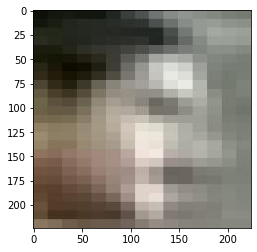

In [20]:
row = rng.choice(train_data.index)
img_name = train_data.iloc[row]['image_names']
img = plt.imread('/content/images/' + img_name)
plt.imshow(img)
target = train_data.iloc[row]['class']
if target == 1:
    print("MALE")
else:
    print("FEMALE")

In [0]:
train_data['class']= train_data['class'].replace({0: 'FEMALE', 1: 'MALE'})

In [0]:
training_data, validate_data = train_test_split(train_data, test_size = 0.2, random_state = 42)
training_data = training_data.reset_index(drop=True)
validate_data = validate_data.reset_index(drop=True)

In [25]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    training_data, 
    "/content/images/", 
    x_col='image_names',
    y_col='class',
    target_size=(128, 128),
    class_mode='categorical',
    batch_size= 15
)

Found 9756 validated image filenames belonging to 2 classes.


In [26]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_data, 
    "/content/images/", 
    x_col='image_names',
    y_col='class',
    target_size=(128, 128),
    class_mode='categorical',
    batch_size=15
)

Found 2440 validated image filenames belonging to 2 classes.


In [27]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)       

In [29]:
history = model.fit_generator(
    train_generator, 
    epochs=50,
    validation_data=validation_generator,
    validation_steps=2440//15,
    steps_per_epoch=9756//15
)

Epoch 1/50
650/650 [==============================] - 57s 87ms/step - loss: 0.3312 - accuracy: 0.8603 - val_loss: 0.2489 - val_accuracy: 0.8909
Epoch 2/50
650/650 [==============================] - 57s 87ms/step - loss: 0.3188 - accuracy: 0.8634 - val_loss: 0.3295 - val_accuracy: 0.9134
Epoch 3/50
650/650 [==============================] - 57s 88ms/step - loss: 0.3113 - accuracy: 0.8681 - val_loss: 0.3402 - val_accuracy: 0.8416
Epoch 4/50
650/650 [==============================] - 56s 86ms/step - loss: 0.3137 - accuracy: 0.8672 - val_loss: 0.6157 - val_accuracy: 0.8990
Epoch 5/50
650/650 [==============================] - 56s 86ms/step - loss: 0.3104 - accuracy: 0.8723 - val_loss: 0.1114 - val_accuracy: 0.8800
Epoch 6/50
650/650 [==============================] - 56s 86ms/step - loss: 0.3148 - accuracy: 0.8643 - val_loss: 0.2794 - val_accuracy: 0.8953
Epoch 7/50
650/650 [==============================] - 56s 86ms/step - loss: 0.3099 - accuracy: 0.8718 - val_loss: 0.1002 - val_accuracy:

In [0]:
model.save_weights("model.h5")

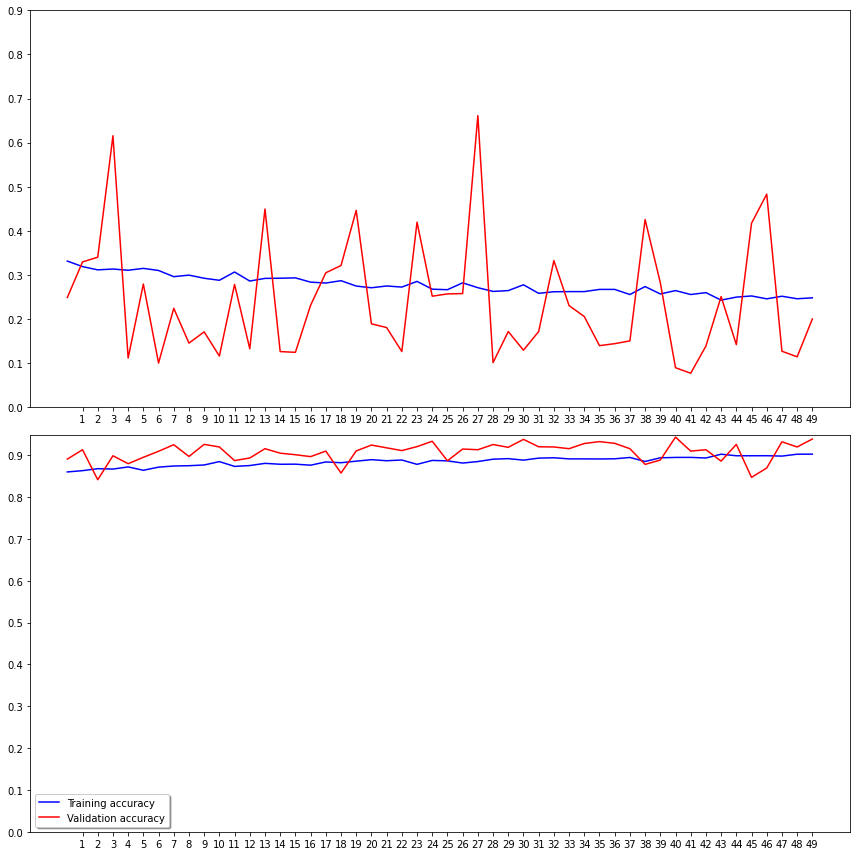

In [35]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, 50, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, 50, 1))
ax2.set_yticks(np.arange(0, 1, 0.1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [37]:
test_data.head(5)

,image_names
0,5603.jpg
1,1286.jpg
2,9815.jpg
3,8865.jpg
4,9306.jpg


In [38]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_data, 
    "/content/images/", 
    x_col='image_names',
    y_col=None,
    class_mode=None,
    target_size=(128, 128),
    batch_size=15,
    shuffle=False
)

Found 5227 validated image filenames.


In [0]:
predict = model.predict_generator(test_generator, steps=np.ceil(5227/15))

In [0]:
test_data['class'] = np.argmax(predict, axis=-1)

In [52]:
test_data.head(10)

,image_names,class
0,5603.jpg,1
1,1286.jpg,1
2,9815.jpg,0
3,8865.jpg,0
4,9306.jpg,1
5,1710.jpg,1
6,20510.jpg,0
7,4942.jpg,1
8,2830.jpg,1
9,17536.jpg,0


In [0]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_data['class'] = test_data['class'].replace(label_map)

In [0]:
test_data['class'] = test_data['class'].replace({ 'MALE':1, 'FEMALE':0 })

In [44]:
test_data['class'].value_counts()

0    2689
1    2538
Name: class, dtype: int64

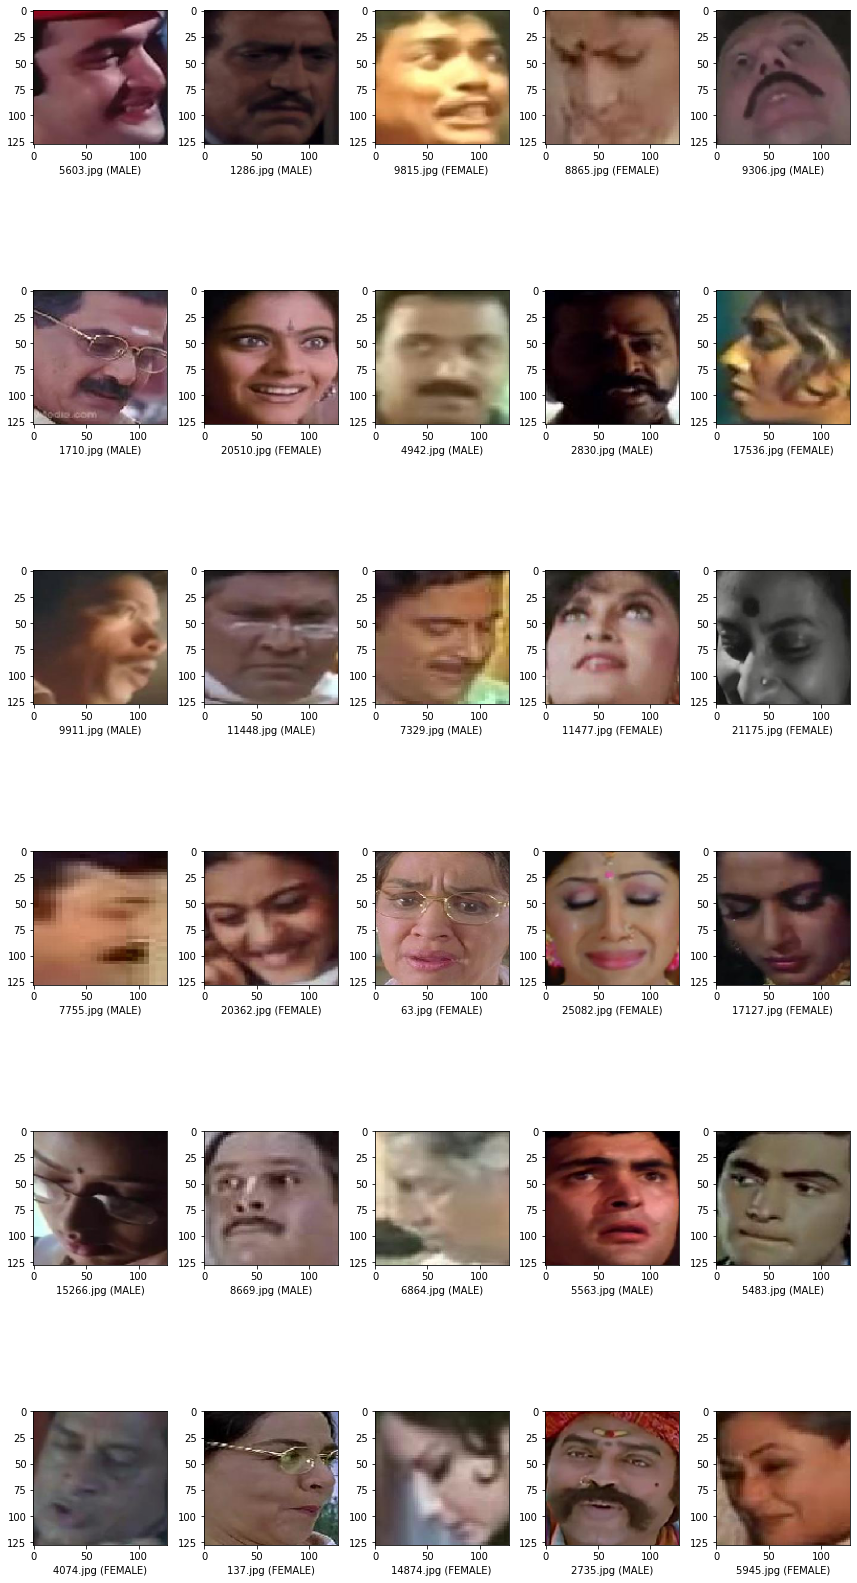

In [49]:
sample_test = test_data.head(30)
#sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    image_name = row['image_names']
    category = row['class']
    img = load_img("/content/images/"+image_name, target_size=(128,128))
    plt.subplot(6, 5, index+1)
    plt.imshow(img)
    plt.xlabel(image_name + ' (' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()